In [1]:
import glob
import imageio
import numpy as np
import matplotlib.pyplot as plt

from deepcell_spots.applications import SpotDetection

from dataset import PolarisPublicationData

import os
os.environ.update({"DEEPCELL_ACCESS_TOKEN": "ooAU9m9e.ZwAPdhGKmWE8YWDgC367uVwfk95iCvNA"})

/usr/local/lib/python3.8/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [2]:
data = PolarisPublicationData()

In [3]:
MERFISH_im, ISS_im, splitFISH_im, seqFISH_im, SunTag_im = data.load_data(figure='S3')
MERFISH_im.shape

(1, 2048, 2048, 1)

In [4]:
# instantiate version of spot detection app without post-processing of output images to coordinates
app = SpotDetection()
app.postprocessing_fn = None

# instantiate full version of the spot detection app
coords_app = SpotDetection()

2023-09-03 23:13:38.103957: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-03 23:13:38.772465: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10395 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:05:00.0, compute capability: 6.1


In [5]:
MERFISH_pred = app.predict(MERFISH_im)
MERFISH_coords = coords_app.predict(MERFISH_im)

2023-09-03 23:13:50.679120: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100


In [6]:
ISS_pred = app.predict(ISS_im)
ISS_coords = coords_app.predict(ISS_im)

In [7]:
SeqFISH_pred = app.predict(seqFISH_im)
SeqFISH_coords = coords_app.predict(seqFISH_im)

In [8]:
splitFISH_pred = app.predict(splitFISH_im)
splitFISH_coords = coords_app.predict(splitFISH_im)

In [9]:
# model was not trained for this data type, so using different parameters
SunTag_pred = app.predict(SunTag_im, clip=False)
SunTag_coords = coords_app.predict(SunTag_im, threshold=0.7, clip=False)

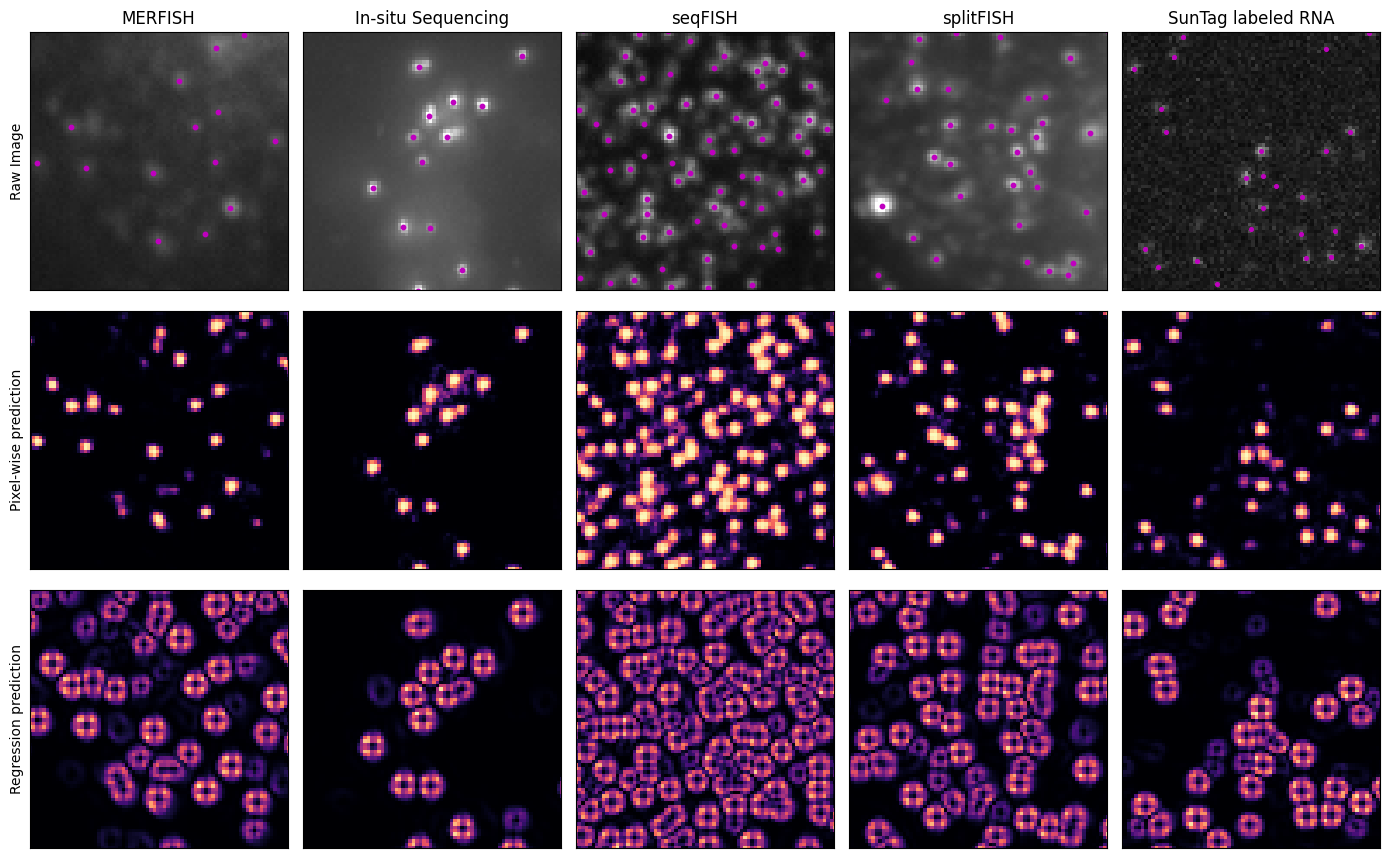

In [10]:
s=10
fig, ax = plt.subplots(3,5,figsize=(14,8.8))

ax[0,0].imshow(MERFISH_im[0,...,0], cmap='gray')
ax[0,0].scatter(MERFISH_coords[0][:,1], MERFISH_coords[0][:,0], c='m', s=s)
ax[1,0].imshow(MERFISH_pred['classification'][0,...,1], cmap='magma')
ax[2,0].imshow(MERFISH_pred['offset_regression'][0,...,0]**2 + MERFISH_pred['offset_regression'][0,...,1]**2,
               cmap='magma')
ax[0,0].set_title('MERFISH')
ax[0,0].set_ylabel('Raw Image')
ax[1,0].set_ylabel('Pixel-wise prediction')
ax[2,0].set_ylabel('Regression prediction')

for i in range(np.shape(ax)[0]):
    ax[i,0].set_xlim([800,875])
    ax[i,0].set_ylim([1200,1125])
    
ax[0,1].imshow(ISS_im[0,...,0], cmap='gray')
ax[0,1].scatter(ISS_coords[0][:,1], ISS_coords[0][:,0], c='m', s=s)
ax[1,1].imshow(ISS_pred['classification'][0,...,1], cmap='magma')
ax[2,1].imshow(ISS_pred['offset_regression'][0,...,0]**2 + ISS_pred['offset_regression'][0,...,1]**2,
               cmap='magma')
ax[0,1].set_title('In-situ Sequencing')
for i in range(np.shape(ax)[0]):
    ax[i,1].set_xlim([775,850])
    ax[i,1].set_ylim([1000,925])
    
ax[0,2].imshow(seqFISH_im[0,...,0], cmap='gray', vmax=5000)
ax[0,2].scatter(SeqFISH_coords[0][:,1], SeqFISH_coords[0][:,0], c='m', s=s)
ax[1,2].imshow(SeqFISH_pred['classification'][0,...,1], cmap='magma')
ax[2,2].imshow(SeqFISH_pred['offset_regression'][0,...,0]**2 + SeqFISH_pred['offset_regression'][0,...,1]**2,
               cmap='magma')
ax[0,2].set_title('seqFISH')
for i in range(np.shape(ax)[0]):
    ax[i,2].set_xlim([200,275])
    ax[i,2].set_ylim([1200,1125])
    
ax[0,3].imshow(splitFISH_im[0,...,0], cmap='gray', vmax=25000)
ax[0,3].scatter(splitFISH_coords[0][:,1], splitFISH_coords[0][:,0], c='m', s=s)
ax[1,3].imshow(splitFISH_pred['classification'][0,...,1], cmap='magma')
ax[2,3].imshow(splitFISH_pred['offset_regression'][0,...,0]**2 + splitFISH_pred['offset_regression'][0,...,1]**2,
               cmap='magma')
ax[0,3].set_title('splitFISH')
for i in range(np.shape(ax)[0]):
    ax[i,3].set_xlim([1025,1100])
    ax[i,3].set_ylim([700,775])
    
ax[0,4].imshow(SunTag_im[0,...,0], cmap='gray', vmax=800)
ax[0,4].scatter(SunTag_coords[0][:,1], SunTag_coords[0][:,0], c='m', s=s-3)
ax[1,4].imshow(SunTag_pred['classification'][0,...,1], cmap='magma')
ax[2,4].imshow(SunTag_pred['offset_regression'][0,...,0]**2 + SunTag_pred['offset_regression'][0,...,1]**2,
               cmap='magma')
ax[0,4].set_title('SunTag labeled RNA')
for i in range(np.shape(ax)[0]):
    ax[i,4].set_xlim([0,75])
    ax[i,4].set_ylim([250,325])
    
for i in range(np.shape(ax)[0]):
    for ii in range(np.shape(ax)[1]):
        ax[i,ii].set_xticks([])
        ax[i,ii].set_yticks([])
    
plt.tight_layout()
plt.show()